In [1]:
import numpy as np

from fpcross import ij, Grid, Func, Solver, Model, Check

ij()

Start |  3:32PM MSK on Nov 29, 2019 | python 3.7.1    |
-------------------------------------------------------


* вычисление интеграла и нормировка в конце шага

* без скалярного креста

* 20 точек в ODE решателе

Solve: 100%|█| 199/199 [11:39<00:00, 12.19s/step, | At T=8.0e+00 :                                                                                                       Edert=1.6e-04  Erhsn=8.4e-03  Estat=1.6e-03]


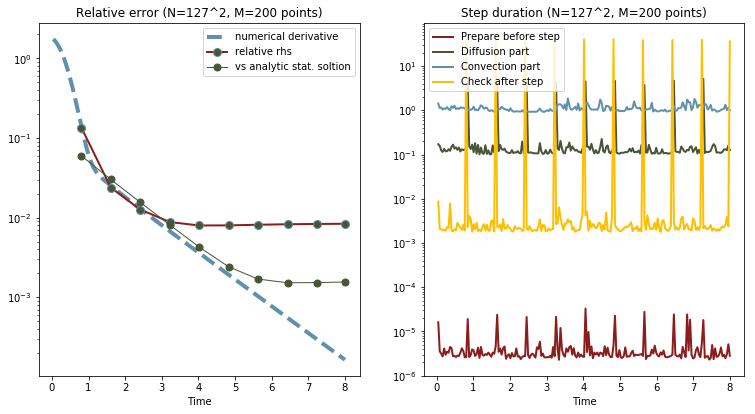

In [2]:
MD = Model.select('fpe_oup')
MD.init(d=2, s=1., D=0.5, A=np.array([
    [0.5, 0.3],
    [0.8, 2.5],
]))

SL = Solver(
    TG=Grid(d=1, n=  200, l=[+0., +8.], k='u'),
    SG=Grid(d=2, n=  127, l=[-6., +6.], k='c'),
    MD=MD, eps=1.E-4, with_tt=False
).init({
    'n_hst': 10,
    'with_rhs': True,
    'with_r_hst': False,
}).prep()

SL.calc()
SL.plot()

In [3]:
SL.info()

------------------ Solver
Format    : 2D, NP [order=2]
Hst pois  : 10 
Hst with r: No 
d r / d t : 1.64e-04
Err  rhs  : 8.37e-03
Err  stat : 1.56e-03
Time full : 7.10e+02 
Time prep : 1.08e+01 
Time calc : 6.99e+02 
    .init : 7.36e-02 
    .prep : 8.82e-04 
    .diff : 8.62e+01 
    .conv : 2.20e+02 
    .post : 3.93e+02 
    .last : 2.04e-02 



In [2]:
MD = Model.select('fpe_oup')
MD.init(d=3, s=1., D=0.5, A=np.array([
    [1.0, 0.2, 0.5],
    [0.0, 0.7, 0.3],
    [0.0, 0.0, 1.5],
]))

SL = Solver(
    TG=Grid(d=1, n=  100, l=[+0., +8.], k='u'),
    SG=Grid(d=3, n=  20, l=[-6., +6.], k='c'),
    MD=MD, eps=1.E-4, with_tt=True
).init({
    'n_hst': 0,
    'with_rhs': False,
    'with_r_hst': False,
}).prep()

%prun SL.calc()

print(len(SL.xxx))
print(np.max(SL.xxx))
print(np.mean(SL.xxx))
print(np.min(SL.xxx))
print(np.sum(SL.xxx))
print(SL.res_conv)

Solve: 100%|██████████████████████████████████| 99/99 [07:27<00:00,  4.29s/step]

 710018
0.2521300039999801
0.00020875934381100455
0.00015903400000638612
148.22289177400182
{'evals': 5912, 't_func': 0.0, 'iters': 1, 'err_rel': 9e-07, 'err_abs': 2.6e-07, 'erank': 18.5}


         203316604 function calls (203315000 primitive calls) in 447.775 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   710018   59.540    0.000   69.456    0.000 polycheb.py:3(polycheb)
  1420036   38.433    0.000  149.365    0.000 ord_solver.py:87(comp)
  7609620   32.067    0.000   32.067    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   710516   22.741    0.000   25.986    0.000 vector.py:107(to_list)
   710030   20.909    0.000   29.675    0.000 grid.py:193(comp)
   710217   19.816    0.000   70.636    0.000 grid.py:65(__init__)
  2840072   16.906    0.000   96.259    0.000 solver.py:457(func)
  5680144   15.845    0.000   15.845    0.000 model_fpe_oup.py:140(f0)
   710018   14.320    0.000  146.417    0.000 func.py:385(comp)
  2840868   13.779    0.000   35.661    0.000 _methods.py:58(_mean)
  3566620   13.050    0.000   13.050    0.000 {built-in method numpy.core.multiarray.concatenate}
   710018   11.855   

In [3]:
MD = Model.select('fpe_oup')
MD.init(d=3, s=1., D=0.5, A=np.array([
    [1.0, 0.2, 0.5],
    [0.0, 0.7, 0.3],
    [0.0, 0.0, 1.5],
]))

SL = Solver(
    TG=Grid(d=1, n=  100, l=[+0., +8.], k='u'),
    SG=Grid(d=3, n=  20, l=[-6., +6.], k='c'),
    MD=MD, eps=1.E-4, with_tt=True
).init({
    'n_hst': 0,
    'with_rhs': False,
    'with_r_hst': False,
}).prep()

%prun SL.calc()

print(len(SL.xxx))
print(np.max(SL.xxx))
print(np.mean(SL.xxx))
print(np.min(SL.xxx))
print(np.sum(SL.xxx))
print(SL.res_conv)

Solve: 100%|██████████████████████████████████| 99/99 [01:19<00:00,  1.67step/s]

 894
0.412238612000003
0.08274576786353484
0.004171270000000504
73.97471647000015
{'evals': 12260, 't_func': 0.0, 'iters': 1, 'err_rel': 9e-07, 'err_abs': 2.6e-07, 'erank': 18.5}


         40194159 function calls (40192563 primitive calls) in 79.304 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  2138720   16.767    0.000   43.934    0.000 grid.py:510(is_out)
  3081009   13.532    0.000   13.532    0.000 {built-in method numpy.core.multiarray.c_einsum}
      894   12.818    0.014   73.924    0.083 func.py:358(comp)
  3823026   12.571    0.000   12.571    0.000 {method 'reduce' of 'numpy.ufunc' objects}
  3813918    5.648    0.000   18.707    0.000 fromnumeric.py:64(_wrapreduction)
  3809780    3.717    0.000   22.350    0.000 fromnumeric.py:2227(amax)
  2138720    2.973    0.000    4.192    0.000 grid.py:623(_prep_poi)
  3081009    1.859    0.000   15.906    0.000 einsumfunc.py:983(einsum)
  8582959    1.589    0.000    1.591    0.000 {built-in method builtins.isinstance}
    21000    0.748    0.000    0.748    0.000 {built-in method numpy.core.multiarray.concatenate}
    13613    0.634    0.000   

In [22]:
def func(x):
    return 2. * np.sin(np.pi * x[0, ]) + np.exp(-x[1, ]) + x[2, ] / 2.

GR = Grid(d=3, n=[20, 22, 24], l=[
    [-3., 4.],
    [-2., 3.],
    [-1., 1.],
])
FN = Func(GR, eps=1.E-6, with_tt=True)
FN.init(func, opts={
    'with_Y_hst': True,
})
FN.prep()
FN.calc()
FN.info(n_test=100)

e = FN.test(n=1000, is_u=True)
print('-->Test (uni.gr.)|\nError (max)      : %-8.0e'%np.max(np.abs(e)))

------------------ Function  
Format           : 3D, TT, eps= 1.00e-06
--> Time (sec.)  |       
Prep             : 1.45e-01 
Calc             : 7.02e-04 
Comp (average)   : 4.10e-05 
Func (average)   : 5.11e-05 
--> Test         |       
Random points    :      Yes   
Number of points :      100   
Error (max)      : 1.77e-02 
Error (mean)     : 4.99e-04 
Error (min)      : 2.51e-06 
--> Cross params |       
Initial guess    :       No   
nswp             :      200   
kickrank         :        1   
rf               : 2.00e+00 
--> Cross result | 
Func. evaluations:     1685   
Cross iterations :        3   
Av. tt-rank      : 7.50e+00 
Cross err (rel)  : 4.40e-16 
Cross err (abs)  : 1.50e-13 
-->Test (uni.gr.)|
Error (max)      : 4e-02   


In [19]:
def func(x):
    return 2. * np.sin(np.pi * x[0, ]) + np.exp(-x[1, ]) + x[2, ] / 2.

GR = Grid(d=3, n=[20, 22, 24], l=[
    [-3., 4.],
    [-2., 3.],
    [-1., 1.],
])
FN = Func(GR, eps=1.E-6, with_tt=True)
FN.init(func)
FN.prep()
FN.calc()
FN.info(n_test=100)

e = FN.test(n=1000, is_u=True)
print('-->Test (uni.gr.)|\nError (max)      : %-8.0e'%np.max(np.abs(e)))

------------------ Function  
Format           : 3D, TT, eps= 1.00e-06
--> Time (sec.)  |       
Prep             : 3.23e-02 
Calc             : 8.72e-04 
Comp (average)   : 4.78e-05 
Func (average)   : 8.94e-07 
--> Test         |       
Random points    :      Yes   
Number of points :      100   
Error (max)      : 2.54e-02 
Error (mean)     : 6.34e-04 
Error (min)      : 6.35e-07 
--> Cross params |       
Initial guess    :       No   
nswp             :      200   
kickrank         :        1   
rf               : 2.00e+00 
--> Cross result | 
Func. evaluations:     3540   
Cross iterations :        3   
Av. tt-rank      : 7.50e+00 
Cross err (rel)  : 4.40e-16 
Cross err (abs)  : 1.50e-13 
-->Test (uni.gr.)|
Error (max)      : 4e-02   


2138720   16.459    0.000   42.941    0.000 grid.py:510(is_out)
3081009   13.277    0.000   13.277    0.000 {built-in method numpy.core.multiarray.c_einsum}
894   12.669    0.014   72.437    0.081 func.py:358(comp)
3823026   12.173    0.000   12.173    0.000 {method 'reduce' of 'numpy.ufunc' objects}
3813918    5.449    0.000   18.110    0.000 fromnumeric.py:64(_wrapreduction)
    
В общем, предсказуемо получается, что основное время потребляет вычисление результата интерполяции в заданных точках (по запросу креста) - это func.py:358(comp). Первые две строчки выдачи prun - это тоже самое (из 


Получается, что много времени уходит на функцию is_out. Она проверяет при вычислении значения интерполянта в точке - лежит ли точка вне пределов интерполяции и реализована тривиально:

np.max(l[:, 0] - x) > eps or np.max(x - l[:, 1]) > eps

где l - это пределы области [dimensions, 2]

Без этой проверки я не смогу занулять точки (прообразы), вывалившиеся за пределы области интерполяции

Еще много времени уходит на func.comp - это, опять же, вычисление интерполянта в заданных точках. Работает медленно, поскольку для каждой точки (запрашиваемой крестом) я вынужден вычислять отдельно (не векторизовано). 